In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb


In [368]:
data = pd.read_csv(r"Gia SMP va SMPcap 2021(Giá thị trường SMP).csv", encoding='latin-1', sep = ";")
data.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


EDA 

In [369]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)
data_types = data.dtypes
print("\nData types:\n", data_types)
data.head()


Missing values:
 Ngày    0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
dtype: int64

Data types:
 Ngày     object
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
7       float64
8       float64
9       float64
10      float64
11      float64
12      float64
13      float64
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


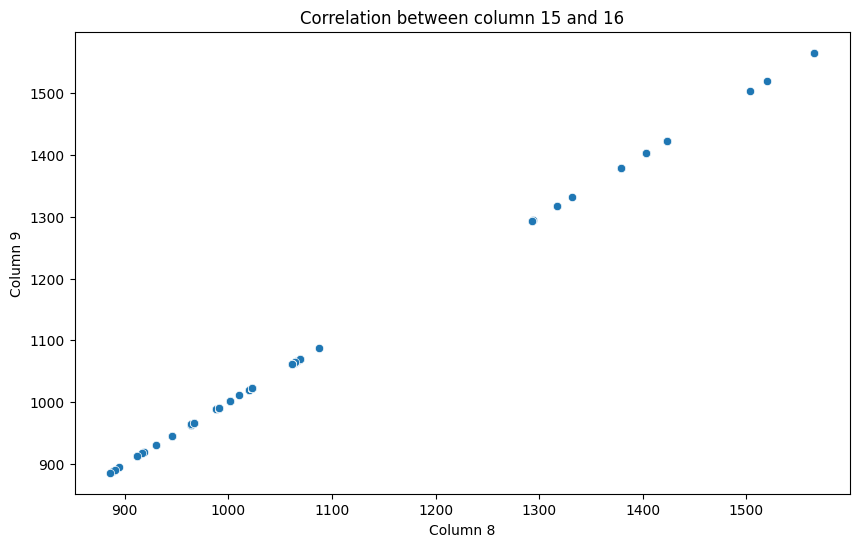

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['15'], y=data['16'])

plt.title('Correlation between column 15 and 16')
plt.xlabel('Column 8')
plt.ylabel('Column 9')

# Hiển thị biểu đồ
plt.show()


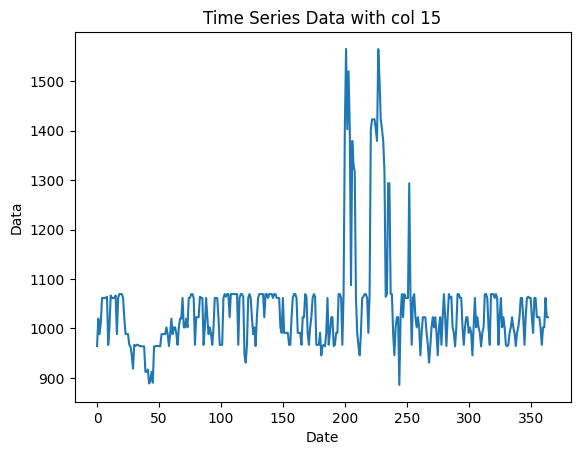

In [371]:
# Biểu đồ trực quan hóa dữ liệu theo ngày
data.set_index('Ngày')
plt.plot(data.index,data['15'])
plt.title('Time Series Data with col 15')
plt.xlabel('Date')
plt.ylabel('Data')
plt.show()


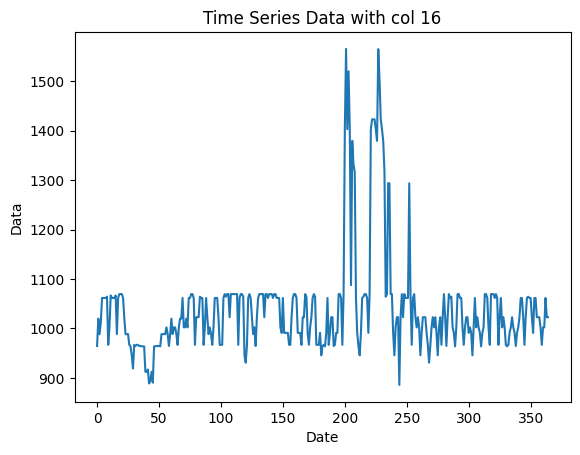

In [372]:
# Biểu đồ trực quan hóa dữ liệu theo ngày
data.set_index('Ngày')
plt.plot(data.index,data['16'])
plt.title('Time Series Data with col 16')
plt.xlabel('Date')
plt.ylabel('Data')
plt.show()


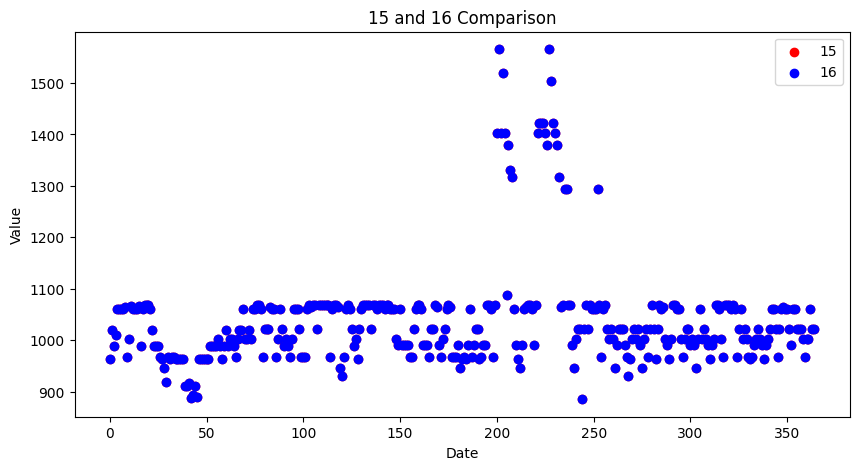

In [373]:
plt.figure(figsize=(10,5))
plt.scatter(data.index, data['15'], color='red', label='15')
plt.scatter(data.index, data['16'], color='blue', label='16')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('15 and 16 Comparison')
plt.legend()
plt.show()


BGM+PCA

In [374]:
# Chuẩn bị dữ liệu cho BGM và PCA
feats = ['15', '16']
transformer = PowerTransformer()
X=transformer.fit_transform(data[feats])
pca = PCA(n_components=2,random_state=1)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(data[feats]), columns=(["col1","col2"]))
PCA_ds.describe().T


c:\Users\COMPUTER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
col1,365.0,-1450.364469,146.585829,-2182.535944,-1480.025652,-1425.653948,-1377.974147,-1234.655913
col2,365.0,-246.964394,24.961152,-371.641433,-252.018234,-242.759840,-234.640940,-210.236763


In [375]:
# Thực hiện BGM và thêm cụm vào dataframe gốc
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
preds = BGM.fit_predict(X)
data["Clusters"]= preds


In [376]:
# Tính toán xác suất của mỗi dự đoán và thêm vào dataframe mới
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(7)]]=pp
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)


In [377]:
# Chuẩn bị dữ liệu cho mô hình LightGBM
train_index=np.array([])
for n in range(7):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']
params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 


In [378]:
# Huấn luyện mô hình LightGBM
model_list=[]
gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   
    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)  
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    model_list.append(model)


[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15


In [379]:
feats=['15','16'];
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])
labels=np.argmax(lgb_preds,axis=1)

In [380]:
u = np.unique(labels)
u

array([0], dtype=int64)

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,1, projection='3d', label="bla")
ax.scatter(data['15'], data['16'], s=40, marker='o', cmap = 'rainbow' )
ax.set_title("Before clustering")
ax = plt.subplot(1,2,2, projection='3d', label="bla")
ax.scatter(data['15'], data['16'], s=40, c=data["Clusters"], marker='o',cmap="rainbow")
ax.set_title("After Clustering")
plt.show()

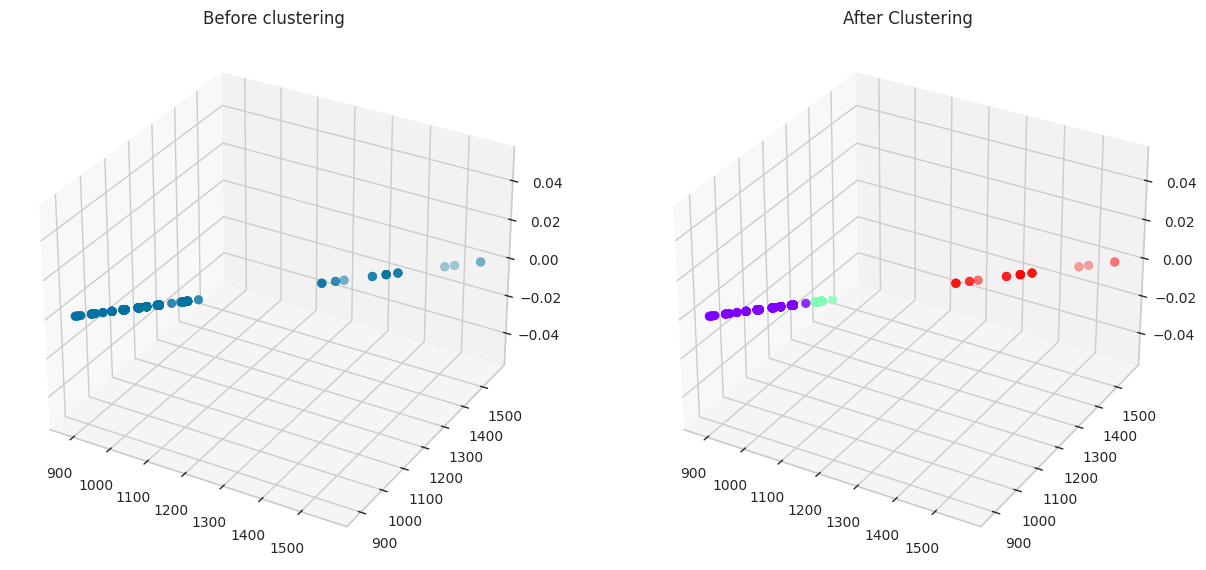

### Random Forest

In [381]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

look_back = 3

trainX, trainY = create_dataset(data['16'], look_back)


In [382]:
model = RandomForestRegressor(n_estimators=100, random_state=1)


In [383]:
model.fit(trainX, trainY)


RandomForestRegressor(random_state=1)

In [384]:
predictions = model.predict(trainX)


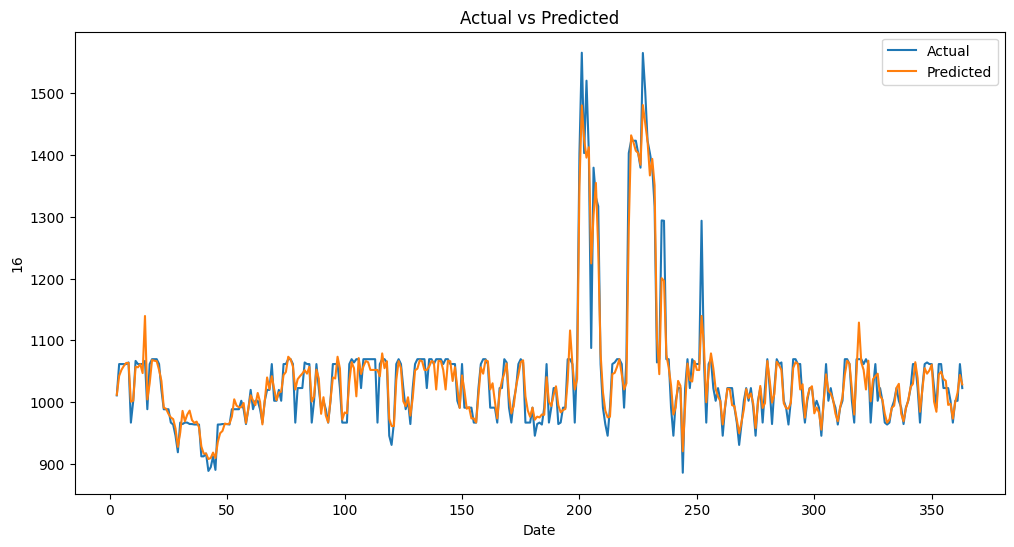

In [385]:
plt.figure(figsize=(12,6))
plt.plot(data.index[look_back:len(predictions)+look_back], data['16'][look_back:len(predictions)+look_back], label='Actual')
plt.plot(data.index[look_back:len(predictions)+look_back], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('16')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
